# **2. Exploratory Data Analysis**

## Imports

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Statistics imports
import scipy.stats as stats
from scipy.stats import pearsonr
from scipy.stats import skew # Skewness for normality
from scipy.stats import kurtosis # Kurtosis value of the normal distribution
from scipy.stats import chi2_contingency # chi-square contingency table
from scipy.stats import chisquare  # chi-square 
from statsmodels.graphics.gofplots import qqplot # normality plot
from scipy.stats import shapiro # Normality test
from statsmodels.graphics.gofplots import qqplot # Plot for checking normality

## **2.1 Load Data**

In [45]:
df=pd.read_csv('data_eda.csv')

In [46]:
df.shape

(16000, 108)

## **2.2 Analysis of Users**

In [47]:
print('There is a total of', df['username_y'].nunique(), 'unique users.')

There is a total of 8696 unique users.


**Note:** Some columns are related to users as account usage, total reviews, etc. I will create a new dataframe for user-related analysis.

In [48]:
# check the users' names
df.sort_values(by='user_reviews_total', ascending=False)[['username_y','user_reviews_total', 
                                                          'voteSum', 'voteSum','user_account_usage',
                                                          'rating']].head()

,username_y,user_reviews_total,voteSum,voteSum,user_account_usage,rating
13591,Drakemeetslara,636,0,0,33444840,3
7401,Drakemeetslara,636,0,0,33444840,5
959,Drakemeetslara,636,0,0,33444840,5
14565,Drakemeetslara,636,0,0,33444840,5
7219,Drakemeetslara,636,0,0,33444840,5


In [49]:
# create a df from columns which are related to users
users = df[['username_y', 'label', 'user_reviews_1','user_reviews_2', 'user_reviews_3', 
            'user_reviews_4', 'user_reviews_5', 'rating', 'price', 'length', 
            'user_account_usage', 'user_reviews_total','voteSum', 'voteCount']]
users.head()

,username_y,label,user_reviews_1,user_reviews_2,user_reviews_3,user_reviews_4,user_reviews_5,rating,price,length,user_account_usage,user_reviews_total,voteSum,voteCount
0,Haydensimpkins93,0,0.0,0.0,0.000000,0.000000,100.000000,5,0.00,187,0,1,0,0
1,Spamminton13,0,0.0,0.0,25.000000,25.000000,50.000000,5,0.00,105,65517000,4,0,0
2,Graster 15,0,0.0,0.0,16.666667,16.666667,66.666667,5,1.99,88,49330200,6,0,0
3,Dhaisley,0,0.0,0.0,0.000000,80.000000,20.000000,4,0.00,206,27965940,5,0,0
4,Jay5050,0,0.0,0.0,0.000000,0.000000,100.000000,5,0.00,85,32929440,2,0,0


In [50]:
# Get the average of 'label','length','rating', 'price', 'paid' columns
df_use = users.groupby(by='username_y')['label','length','rating', 'price'].agg('mean')
df_use.head()

,label,length,rating,price
username_y,,,,
Dede U,0.0,21.0,4.0,0.00
I'm Sirius,0.0,27.0,5.0,0.00
Monty 88,0.0,19.0,5.0,0.00
maniac k,0.0,51.0,4.0,0.99
!Do!,0.0,54.0,4.0,0.00


In [51]:
# Rename columns
df_use = df_use.add_prefix('ave_')

In [52]:
# Reset index for using username column
df_use.reset_index(inplace=True)

In [53]:
# Drop duplicates in username column
users.drop_duplicates(subset=['username_y'], inplace=True)

# drop the columns which I got the averages
users.drop(columns=['label','length','rating', 'price'], inplace=True)

# check the shape of column. There should be 8696 unique users
users.shape

(8696, 10)

In [54]:
# Merge two dataframe
users = df_use.merge(users, on='username_y', how='inner')
print(users.shape)
users.head()

(8696, 14)


,username_y,ave_label,ave_length,ave_rating,ave_price,user_reviews_1,user_reviews_2,user_reviews_3,user_reviews_4,user_reviews_5,user_account_usage,user_reviews_total,voteSum,voteCount
0,Dede U,0.0,21.0,4.0,0.00,0.000000,0.0,0.000000,66.666667,33.333333,150993180,6,0,0
1,I'm Sirius,0.0,27.0,5.0,0.00,25.000000,0.0,0.000000,0.000000,75.000000,190985640,4,0,0
2,Monty 88,0.0,19.0,5.0,0.00,22.222222,0.0,11.111111,22.222222,44.444444,175860060,9,0,0
3,maniac k,0.0,51.0,4.0,0.99,20.000000,20.0,0.000000,60.000000,0.000000,49271580,5,0,0
4,!Do!,0.0,54.0,4.0,0.00,9.090909,0.0,9.090909,18.181818,63.636364,145384260,11,0,0


In [55]:
users.isna().sum()

username_y              0
ave_label               0
ave_length              0
ave_rating              0
ave_price             101
user_reviews_1          0
user_reviews_2          0
user_reviews_3          0
user_reviews_4          0
user_reviews_5          0
user_account_usage      0
user_reviews_total      0
voteSum                 0
voteCount               0
dtype: int64

**Labeling Users - Real and Fake Users**

In [56]:
users.ave_label.value_counts(normalize=True)

0.000000    0.919158
1.000000    0.080497
0.976744    0.000115
0.857143    0.000115
0.888889    0.000115
Name: ave_label, dtype: float64

**Note:** 7993 (91.916%) out of 8696 users haven't posted any fake reviews. A total of 700 (%8.049) users' all reviews are fake. Three users (0.03%) have both fake and genuine reviews and the percent of fake reviews is really high. The likelihood of being a fake user is so high. Therefore these 3 users are labeled as fake (1).

In [57]:
# Find the index of these users
users[(users['ave_label']!=0)&(users['ave_label']!=1)]

,username_y,ave_label,ave_length,ave_rating,ave_price,user_reviews_1,user_reviews_2,user_reviews_3,user_reviews_4,user_reviews_5,user_account_usage,user_reviews_total,voteSum,voteCount
3765,Kch145,0.976744,127.604651,4.976744,0.092558,0.0,0.0,0.0,2.739726,97.260274,62102820,73,0,0
7876,iOSLover90,0.857143,75.285714,4.142857,0.000000,0.0,0.0,10.0,70.000000,20.000000,19305060,10,0,0
8246,nestorov90us,0.888889,156.777778,5.000000,0.000000,0.0,0.0,0.0,2.380952,97.619048,10694880,378,0,0


In [58]:
# Let's label three users as fake
users.at[3765, 'ave_label'] = 1
users.at[7876, 'ave_label'] = 1
users.at[8246, 'ave_label'] = 1

**Note:** I have a new feature as label of users. 
Fake User (label=1) and Real User (label=0).

***Fake user:*** Except for 3 cases, all the reviews of these users are fake. For 3 cases minimum average percentage of fake reviews is 85%.

***Real Users:*** They don't have any fake reviews.

In [59]:
# Check the percentages
users.ave_label.value_counts(normalize=True)

0.0    0.919158
1.0    0.080842
Name: ave_label, dtype: float64

In [60]:
# Rename column
users.rename(columns={'ave_label':'user_label'}, inplace=True)

In [61]:
# Merge users dataframe to main df
# In users df, there are information related to unique users' info.
# Get this columns
df_merge = users[['username_y','user_label','ave_length','ave_rating','ave_price']]

df = df.merge(df_merge, how='left', on='username_y')


In [62]:
# Rename for further statistics
users.rename(columns={'user_label':'label'}, inplace=True)

### **2.2.1 Ratings Given by  All Users**

Firstly, let's  see the the boxplots of ratings given by users.

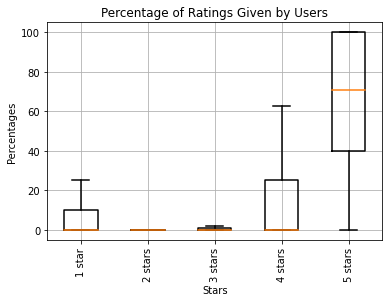

In [63]:
# Plot graph
ax = users[['user_reviews_1','user_reviews_2', 'user_reviews_3', 
       'user_reviews_4', 'user_reviews_5']].plot(kind='box',
             color=dict(boxes='r', whiskers='r', medians='r', caps='r'),
             boxprops=dict(linestyle='-', linewidth=1.5),
             flierprops=dict(linestyle='-', linewidth=1.5),
             medianprops=dict(linestyle='-', linewidth=1.5),
             whiskerprops=dict(linestyle='-', linewidth=1.5),
             capprops=dict(linestyle='-', linewidth=1.5),
             showfliers=False, grid=True, rot=0)

# Adding titles and labels
ax.set_title('Percentage of Ratings Given by Users')
ax.set_xlabel('Stars')
ax.set_ylabel('Percentages')
ax.set_xticklabels(labels = ['1 star', '2 stars', '3 stars', '4 stars', '5 stars'], rotation=90)

plt.show()

Users mostly give 5 stars to applications. 

### **2.2.2 Ratings Given by Users: Fake vs. Real Users**

Based on fake and real labels, let's find the average percentages of ratings/stars. 

In [64]:
# Let's get a table for averages
g = users.groupby('label')['user_reviews_1','user_reviews_2', 'user_reviews_3',
                           'user_reviews_4', 'user_reviews_5'].mean()
g

,user_reviews_1,user_reviews_2,user_reviews_3,user_reviews_4,user_reviews_5
label,,,,,
0.0,10.436133,3.507758,6.063045,15.852283,64.140781
1.0,4.147377,1.710628,4.588503,18.311390,71.242102


<Figure size 2160x576 with 0 Axes>

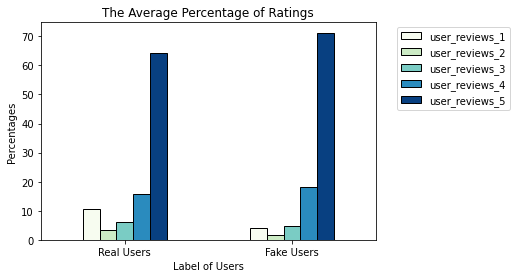

In [65]:
# Plot the bar plot of average percentages
plt.figure(figsize=(30,8))
g=g.reset_index()

g.plot(x='label', y=['user_reviews_1','user_reviews_2', 'user_reviews_3', 'user_reviews_4', 'user_reviews_5'],
       kind="bar",  colormap='GnBu',edgecolor = "black")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

# Labels
plt.title('The Average Percentage of Ratings')
plt.xticks([0, 1], ['Real Users', 'Fake Users'], rotation=0)
plt.xlabel('Label of Users')
plt.ylabel('Percentages')
plt.show()

### **2.2.3 Users who have 1 review**

In this part, we will focus on users who have just one review. 

In [66]:
print('The number of users who has just 1 review is', len(users[users### **2.2.2 Ratings Given by Users: Fake vs. Real Users**
["user_reviews_total"]==1]))

The number of users who has just 1 review is 1734


In [67]:
print('Number of fake users who have just one review:', len(users[(users["user_reviews_total"]==1)& (users["label"]==1)]))
print('Number of real users who have just one review:', len(users[(users["user_reviews_total"]==1)& (users["label"]==0)]))

Number of fake users who have just one review: 31
Number of real users who have just one review: 1703


In [68]:
print(round(1703/1734*100, 3), 'percentage of users who have 1 review are real.')

98.212 percentage of users who have 1 review are real.


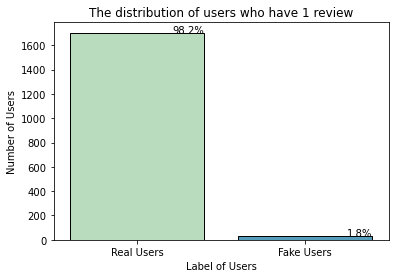

In [69]:
# the crosstable for users who has just 1 review
g = sns.countplot(x = 'label', data =  users[users["user_reviews_total"]==1],palette='GnBu', edgecolor = "black")

# Labels
g.set_title("The distribution of users who have 1 review", fontsize=12)
g.set(xlabel="Label of Users",
      ylabel="Number of Users")
g.set_xticklabels(['Real Users', 'Fake Users'])

# Show the percentages on the top of bars.
for p in g.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/1734)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    g.annotate(percentage, (x, y),ha='right')
plt.show()

***Is there a difference between the fake or real reviews of users who only have one review?***

In [70]:
# Carry out one-way chis-square.
chisquare([31, 1703], [140, 1594])

Power_divergenceResult(statistic=92.31786162394694, pvalue=7.381506054475312e-22)

**Note:** I will create a new feature for users who have just one review. 

In [71]:
# if a user has just one value df['1_review'] equals 1
df['1_review'] = np.where(df['user_reviews_total']==1,1,0)

# check the number of users 
df['1_review'].value_counts()

0    14266
1     1734
Name: 1_review, dtype: int64

### **2.2.4 Users' total reviews: Fake vs. Real Users**

In [72]:
# Descriptive statistics of total reviews.
users.groupby(["label"])["user_reviews_total"].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0.0,7993.0,6.850619,16.464858,1.0,2.0,4.0,7.0,573.0
1.0,703.0,31.503556,50.842948,1.0,6.0,16.0,35.0,636.0


In [73]:
users["user_reviews_total"].sort_values()

3646      1
3105      1
5248      1
1472      1
5247      1
       ... 
8246    378
497     411
5049    469
6280    573
2077    636
Name: user_reviews_total, Length: 8696, dtype: int64

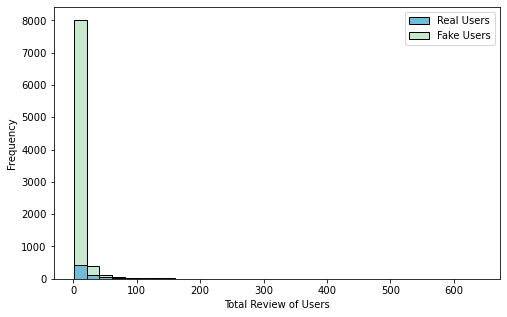

In [74]:
plt.figure(figsize=(8,5))
sns.histplot(x='user_reviews_total', data=users, hue='label', binwidth=20, palette='GnBu'
            ,multiple='stack')
plt.xlabel('Total Review of Users')
plt.ylabel('Frequency')
plt.legend(['Real Users', 'Fake Users'])
plt.show()

<Figure size 1440x720 with 0 Axes>

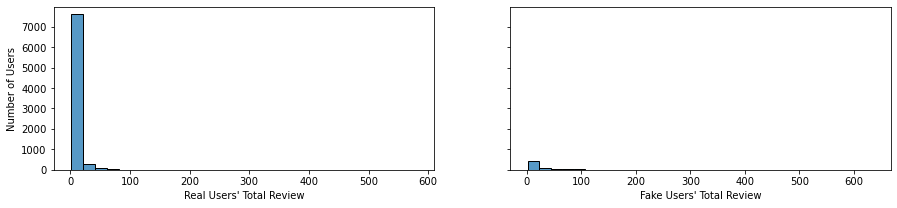

In [75]:
# Histogram of total reviews
plt.figure(figsize=(20,10))
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(15,3))

sns.histplot(users[users['label']==0]['user_reviews_total'], ax=ax0, bins=30, binwidth=20)
sns.histplot(users[users['label']==1]['user_reviews_total'], ax=ax1, bins=30)
ax0.set(xlabel="Real Users' Total Review")
ax1.set(xlabel="Fake Users' Total Review")
ax0.set(ylabel='Number of Users')
plt.show()

***Is there a difference between real and fake users regarding total reviews?***

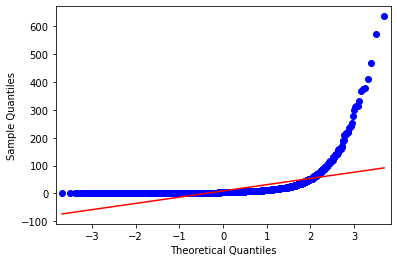

In [76]:
# Check normality
qqplot(users['user_reviews_total'], line='s')
plt.show()

The plot indicates the sampling distribution is not normally distributed.

In [77]:
# normality test with Shapiro test
stat, p = shapiro(users['user_reviews_total'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.288, p=0.000
Sample does not look Gaussian (reject H0)


In [78]:
# use  skewness and kurtosis to measure the shape of a distribution.
print('kurtosis:', kurtosis(users['user_reviews_total'], axis=0, bias=True))
print('skewness:', skew(users['user_reviews_total'], axis=0, bias=True))

kurtosis: 211.26882083532044
skewness: 11.788638482749173


**Note:**

A kurtosis greater than 3 shows that distribution tends to produce more outliers than the normal distribution.

A positive skew (11.78) indicates that the tail is on the right side of the distribution, which extends towards more positive values. 

In [79]:
# carry out t test for explore difference between averages
stats.ttest_ind(users['user_reviews_total'][users['label'] == 0],
                users['user_reviews_total'][users['label'] == 1])

Ttest_indResult(statistic=-29.28479909105381, pvalue=7.114583206267576e-180)

**Note:** Total number reviews difference between fake and real users is statistically significant 

### **2.2.5 Users' vote counts: Fake vs. Real Users**

In [80]:
users.groupby(["label"])["voteCount"].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0.0,7993.0,0.066308,1.088137,0.0,0.0,0.0,0.0,84.0
1.0,703.0,0.045519,0.520989,0.0,0.0,0.0,0.0,12.0


***Is there a difference between real and fake users regarding vote counts?***

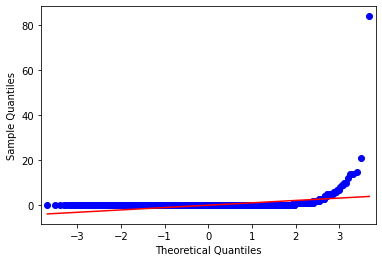

In [81]:
# Check normality
qqplot(users['voteCount'], line='s')
plt.show()

The plot indicates the sampling distribution is not normally distributed.

In [82]:
# normality test
stat, p = shapiro(users['voteCount'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.031, p=0.000
Sample does not look Gaussian (reject H0)


In [83]:
# Carry out two-sample t-test
stats.ttest_ind(users['voteCount'][users['label'] == 0],
                users['voteCount'][users['label'] == 1])

Ttest_indResult(statistic=0.5015014866990243, pvalue=0.6160309300438593)

**Note:** There is no stastically significant difference between fake and real users regards to vote counts. 

### **2.2.6 Users' account usage: Fake vs. Real Users**

In [84]:
users.groupby(["label"])["user_account_usage"].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0.0,7993.0,6.594189e+07,6.408793e+07,0.0,3418200.0,49017180.0,114672720.0,272820300.0
1.0,703.0,5.521763e+07,6.092646e+07,0.0,4865220.0,29575380.0,91190310.0,257020620.0


***Is there a difference between real and fake users regarding account usage?***

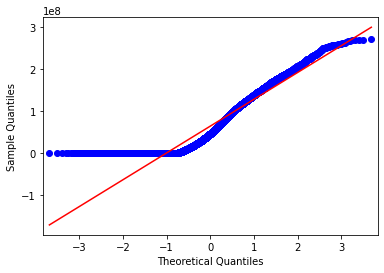

In [85]:
qqplot(users['user_account_usage'], line='s')
plt.show()

The plot indicates the sampling distribution is not normally distributed.

In [86]:
# normality test
stat, p = shapiro(users['user_account_usage'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.887, p=0.000
Sample does not look Gaussian (reject H0)


In [87]:
# Carrying out the two sample t-test
stats.ttest_ind(users['user_account_usage'][users['label'] == 0],
                users['user_account_usage'][users['label'] == 1])

Ttest_indResult(statistic=4.270296732523434, pvalue=1.9728870755966397e-05)

**Note:** Real users' time span between the first and last review is longer.

### **2.2.7 Average rating given by users: Fake vs. Real Users**

In [88]:
users.groupby(["label"])["ave_rating"].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0.0,7993.0,4.197173,1.329563,1.0,4.000000,5.000000,5.0,5.0
1.0,703.0,4.603794,0.544046,1.0,4.320513,4.857143,5.0,5.0


***Is there a difference between real and fake users in terms of the average rating they give?***

In [89]:
# use  skewness and kurtosis to measure the shape of a distribution.
print('kurtosis:', kurtosis(users['ave_rating'], axis=0, bias=True))
print('skewness:', skew(users['ave_rating'], axis=0, bias=True))

kurtosis: 1.3265496678986253
skewness: -1.6382018920530206


**Note:** This means the distribution is slightly negatively skewed and the distribution has fewer values in the tails compared to a normal distribution.

In [90]:
# normality test
stat, p = shapiro(users['ave_rating'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.634, p=0.000
Sample does not look Gaussian (reject H0)


In [91]:
# Carrying out the two sample t-test
stats.ttest_ind(users['ave_rating'][users['label'] == 0],
                users['ave_rating'][users['label'] == 1])

Ttest_indResult(statistic=-8.049438560963647, pvalue=9.413732714561595e-16)

**Note:** Fake users give applications more ratings (X̅ = 4.60) than real users (X̅ = 4.19), and this difference is statistically significant (t = -8.05, p < .05). 


### **2.2.8 Reviews' average lenght: Fake vs. Real Users**

In [92]:
users.groupby(["label"])["ave_length"].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0.0,7993.0,111.821656,149.785900,2.0,29.0,65.0,136.000000,4048.0
1.0,703.0,113.374550,57.505878,11.0,77.0,107.0,138.791667,474.0


***Is there a difference between real and fake users in terms of the average length of their reviews?***

In [93]:
# use  skewness and kurtosis to measure the shape of a distribution.
print('kurtosis:', kurtosis(users['ave_length'], axis=0, bias=True))
print('skewness:', skew(users['ave_length'], axis=0, bias=True))

kurtosis: 93.26949896693903
skewness: 6.112615641298313


**Note:** This means the distribution is positively skewed and the distribution has more values in the tails compared to a normal distribution.

In [94]:
# normality test
stat, p = shapiro(users['ave_length'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.601, p=0.000
Sample does not look Gaussian (reject H0)


In [95]:
# Carrying out the two-way t-test
stats.ttest_ind(users['ave_length'][users['label'] == 0],
                users['ave_length'][users['label'] == 1])

Ttest_indResult(statistic=-0.2731066503809471, pvalue=0.784777721543255)

**Note:** Average length of review’s text is similar between fake and real users.

### **2.2.9 Users' vote counts and vote sum**

***Is there relationship between users' vote counts and vote sum?***

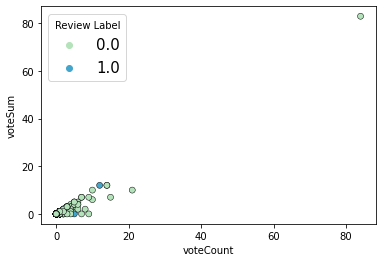

In [96]:
# Examine the correlation between vote counts and vote sums
g = sns.scatterplot(data=users, x="voteCount", y="voteSum", hue='label', palette='GnBu', edgecolor = "black")
g.legend(title = 'Review Label', fontsize = 15) 

In [97]:
corr, _ = pearsonr(users["voteSum"], users["voteCount"])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.971


**Note:** There is a strong relationship between vote counts and vote sum.

### **2.2.10 Average price paid for apps: Fake vs. Real Users**

In [98]:
# there are 101 cases which has NaN in ave-price columns
user_2 = users.dropna()

user_2.groupby(["label"])["ave_price"].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0.0,7895.0,0.697807,15.989274,0.0,0.0,0.0,0.000000,999.99
1.0,700.0,0.143541,0.658036,0.0,0.0,0.0,0.010189,9.99


***Is there a difference between real and fake users regarding the average price they paid for applications?***

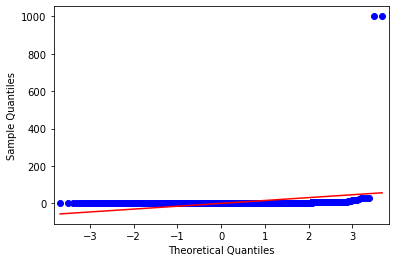

In [99]:
qqplot(user_2['ave_price'], line='s')
plt.show()

The plot indicates the sampling distribution is not normally distributed.

In [100]:
# normality test
stat, p = shapiro(user_2['ave_price'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.013, p=0.000
Sample does not look Gaussian (reject H0)


In [101]:
# Carrying out the two sample t-test
stats.ttest_ind(user_2['ave_price'][user_2['label'] == 0],
                user_2['ave_price'][user_2['label'] == 1])

Ttest_indResult(statistic=0.917029253764453, pvalue=0.3591530467770029)

**Note:** There is no significant difference between fake and real users regarding the average price they paid for applications.

## **2.3 Analysis of Reviews**

In [102]:
# remember the label of reviews column
df['label'].value_counts()

0    8000
1    8000
Name: label, dtype: int64

### 2.3.1 **Review Time**

I will create two different plots both **number** and **percentages** of reviews according to the years.

***Number of reviews***

In [103]:
# create a crosstab for number of reviews 
pd.crosstab(df['review_year'], df['label'], margins=True).T

review_year,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,All
label,,,,,,,,,,,
0,14,77,248,877,1504,1329,1107,1221,1280,343,8000
1,0,0,1,2,11,11,916,3485,2937,637,8000
All,14,77,249,879,1515,1340,2023,4706,4217,980,16000


In [104]:
g1 = pd.crosstab(df['review_year'], df['label']
           ).reset_index().melt(id_vars='review_year', value_vars=[0,1])

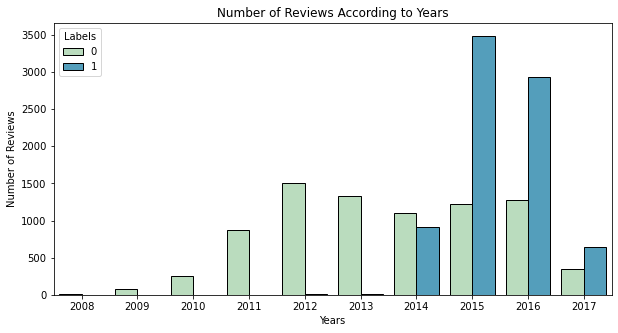

In [105]:
plt.figure(figsize=(10,5))
ax= sns.barplot(x='review_year', y='value', hue='label', data=g1, 
            palette='GnBu', edgecolor = "black")
ax.set_title("Number of Reviews According to Years")
ax.set(xlabel="Years", ylabel="Number of Reviews")
ax.legend(title='Labels', loc='upper left')

In [106]:
# create a crosstab for percentage of reviews 
round(pd.crosstab(df['review_year'], df['label'], normalize='index', margins=True)*100,2).T

review_year,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,All
label,,,,,,,,,,,
0,100.0,100.0,99.6,99.77,99.27,99.18,54.72,25.95,30.35,35.0,50.0
1,0.0,0.0,0.4,0.23,0.73,0.82,45.28,74.05,69.65,65.0,50.0


***Percentage of reviews***

In [107]:
g2 = (round(pd.crosstab(df['review_year'], df['label'], normalize='index')*100, 2
          ).reset_index().melt(id_vars='review_year', value_vars=[0,1]))

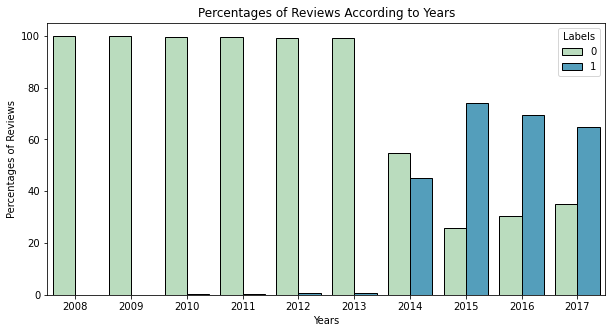

In [108]:
plt.figure(figsize=(10,5))
ax= sns.barplot(x='review_year', y='value', hue='label', data=g2, 
            palette='GnBu', edgecolor = "black")
ax.set_title("Percentages of Reviews According to Years")
ax.set(xlabel="Years", ylabel="Percentages of Reviews")
ax.legend(title='Labels', loc='upper right')

**Note:** After 2014, percentage of fake review is more than real ones.

***Is there a difference between fake and genuine reviews regarding reviews’ publishing years?***

In [109]:
crosstab = pd.crosstab(df['review_year'], df['label']).T
crosstab

review_year,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
label,,,,,,,,,,
0,14,77,248,877,1504,1329,1107,1221,1280,343
1,0,0,1,2,11,11,916,3485,2937,637


In [110]:
# Carry out chi square test
chi2, p, dof, exp = chi2_contingency([crosstab.iloc[0].values,crosstab.iloc[1].values])
print('chi2   :', chi2)
print('p.     :', p)
print('dof    :', dof)
print('expected:', exp)

chi2   : 5821.221808012111
p.     : 0.0
dof    : 9
expected: [[   7.    38.5  124.5  439.5  757.5  670.  1011.5 2353.  2108.5  490. ]
 [   7.    38.5  124.5  439.5  757.5  670.  1011.5 2353.  2108.5  490. ]]


**Note:** There has been a dramatic increase in the number of fake comments since 2014. 

### **2.3.2 Rating of Reviews**

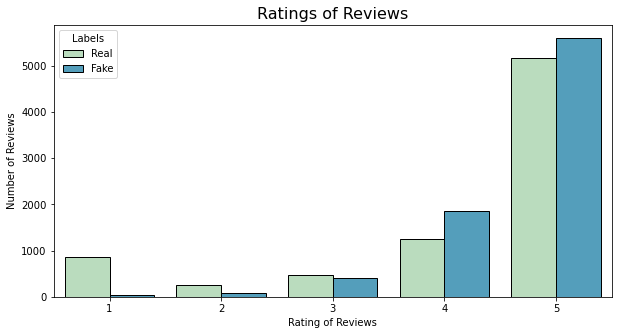

In [111]:
plt.figure(figsize=(10,5))
g = sns.countplot(data=df, x="rating", hue='label', palette='GnBu', edgecolor = "black")
g.set_title("Ratings of Reviews", fontsize=16)
g.set(xlabel="Rating of Reviews",
      ylabel="Number of Reviews")
g.legend(title='Labels', labels = ['Real', 'Fake'], fontsize=10)

In [112]:
# create a cross that shows the number of reviews according to rating
crosstab = pd.crosstab(df['label'], df['rating'],margins=True)
crosstab

rating,1,2,3,4,5,All
label,,,,,,
0,863,264,462,1251,5160,8000
1,48,77,402,1868,5605,8000
All,911,341,864,3119,10765,16000


rating      1      2      3      4      5
label                                    
0       94.73  77.42  53.47  40.11  47.93
1        5.27  22.58  46.53  59.89  52.07


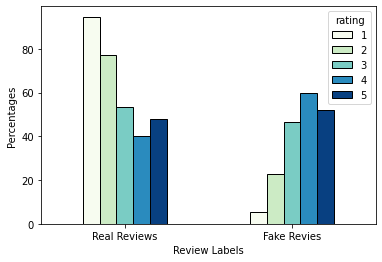

In [113]:
# Create a crosstab
crosstab = round(pd.crosstab(df['label'], df['rating'],normalize='columns')*100,2)
print(crosstab)

# plot
crosstab.plot(kind='bar', colormap='GnBu', edgecolor = 'black')
# Add labels
plt.xlabel('Review Labels')
plt.ylabel('Percentages')
plt.xticks(ticks= [0, 1],labels = ['Real Reviews', 'Fake Revies'], rotation=0)
plt.show()

**Is there a difference between fake and genuine reviews regarding reviews’ ratings?**

In [114]:
chi2, p, dof, exp = chi2_contingency([crosstab.iloc[0].values,crosstab.iloc[1].values])
print('chi2   :', chi2)
print('p.     :', p)
print('dof    :', dof)
print('exp    :', exp)

chi2   : 87.95292541682143
p.     : 3.583028052013565e-18
dof    : 4
exp    : [[62.732 62.732 62.732 62.732 62.732]
 [37.268 37.268 37.268 37.268 37.268]]


**Note:** I want to examine the difference between fake and real which have same rating?

**Is there a difference between fake and genuine reviews which have 1 star?**

In [115]:
chisquare([863, 48])

Power_divergenceResult(statistic=729.1163556531284, pvalue=1.3942577338078144e-160)

**Is there a difference between fake and genuine reviews which have 2 stars?**

In [116]:
chisquare([264, 77])

Power_divergenceResult(statistic=102.54838709677419, pvalue=4.20959096092527e-24)

**Is there a difference between fake and genuine reviews which have 3 stars?**

In [117]:
chisquare([462, 402])

Power_divergenceResult(statistic=4.166666666666667, pvalue=0.041226833337163815)

**Is there a difference between fake and genuine reviews which have 4 stars?**

In [118]:
chisquare([1251, 1868])

Power_divergenceResult(statistic=122.05482526450785, pvalue=2.245463179013636e-28)

**Is there a difference between fake and genuine reviews which have 5 stars?**

In [119]:
chisquare([5160, 5605])

Power_divergenceResult(statistic=18.39526242452392, pvalue=1.7950373070876915e-05)

***How do fake comments distribute according to years and ratings?***

Applications get fake reviews for two reasons: 

* They want to promote their application, or

* Sabotage rival applications. 

For this reason, we want to explore fake reviews distribution each year after 2014.

In [120]:
round(pd.crosstab(df[(df['label']==1)&(df['review_year']>2013)]['review_year']
            , df[(df['label']==1)&(df['review_year']>2013)]['rating']
           , normalize = 'index', margins=True)*100, 2)

rating,1,2,3,4,5
review_year,,,,,
2014,1.09,2.84,9.17,32.86,54.04
2015,0.55,0.75,5.05,24.48,69.18
2016,0.65,0.78,3.06,20.02,75.49
2017,0.00,0.16,8.16,19.15,72.53
All,0.60,0.95,5.04,23.37,70.03


In [121]:
g3 = round(pd.crosstab(df[(df['label']==1)&(df['review_year']>2013)]['review_year']
                , df[(df['label']==1)&(df['review_year']>2013)]['rating']
                , normalize = 'index')*100, 2).reset_index().melt(id_vars=['review_year'], value_vars = [1,2,3,4,5])

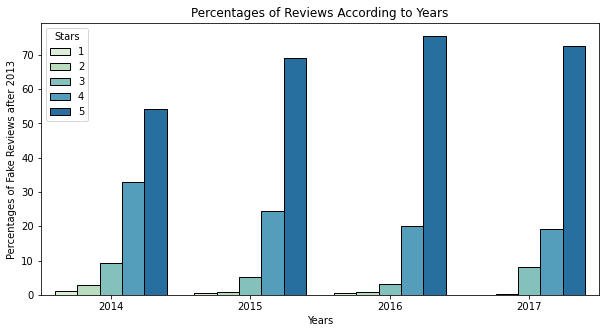

In [122]:
plt.figure(figsize=(10,5))
ax= sns.barplot(x='review_year', y='value', hue='rating', data=g3, 
            palette='GnBu', edgecolor = "black")
ax.set_title("Percentages of Reviews According to Years")
ax.set(xlabel="Years", ylabel="Percentages of Fake Reviews after 2013")
ax.legend(title='Stars', loc='upper left')

**Note:** After the fake comments started to be used, fake reviews were mostly used to promote  app.

### **2.3.4 Length of Reviews**

In [123]:
# Descriptive statistics
df.groupby(["label"])["length"].agg(['mean', 'max', 'min', 'std'])

,mean,max,min,std
label,,,,
0,111.839625,4048,2,149.73363
1,121.178875,628,11,58.82655


In [124]:
# The top 10 longest text lenghts
df[df['label']==0]['length'].sort_values(ascending=False).head(10)

2681     4048
13678    2778
7900     1956
4850     1601
2750     1518
5548     1396
3609     1297
10759    1278
757      1276
1823     1268
Name: length, dtype: int64

In [125]:
# Check the number 
df[df['label']==1]['length'].shape

(8000,)

**Note:**  Real reviews have a few outliers. I excluded the first five (>1500) for just plotting the histogram.

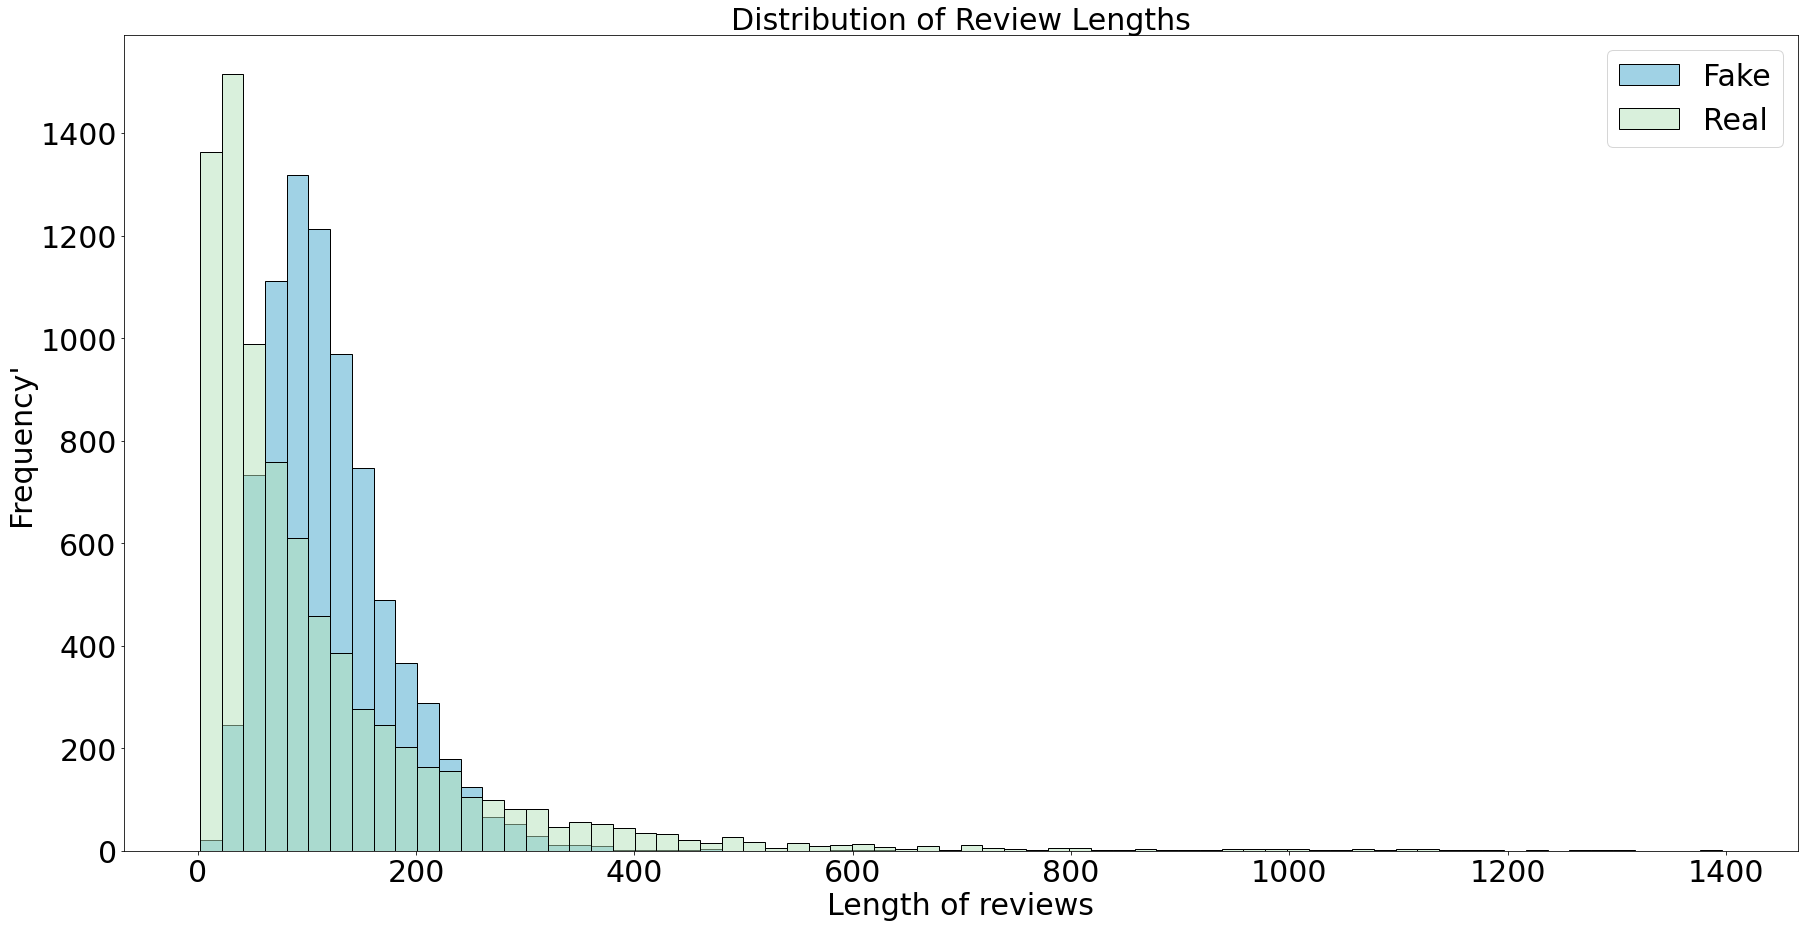

In [126]:
plt.figure(figsize=(30,15))
g = sns.histplot(data = df[df['length']<1500], x= 'length', bins=70, 
             hue='label',palette='GnBu' )
g.set_xlabel("Length of reviews",fontsize=30)
g.set_ylabel("Frequency'",fontsize=30)
g.axes.set_title("Distribution of Review Lengths",fontsize=30)
g.legend(labels = ['Fake', 'Real'], fontsize=30)
g.tick_params(labelsize=30)

plt.show()


**Note:** As seen in figure,  the number of real reviews is much higher when the review length is 40 or less. I want to see the number of reviews whose lenght is less than 41.

In [127]:
# the percentage of real reviews whose length is less than 50
print('Number:' , df[(df['label']==0) & (df['length']<=40)].shape[0])
print('Percentage:', round(df[(df['label']==0) & (df['length']<=40)].shape[0]/8000*100,2))

Number: 2809
Percentage: 35.11


In [128]:
# the percentage of fake reviews whose length is less than 50
print('Number:' , df[(df['label']==1) & (df['length']<=40)].shape[0])
print('Percentage:', round(df[(df['label']==1) & (df['length']<=40)].shape[0]/8000*100,2))

Number: 252
Percentage: 3.15


***Is there a difference between fake and genuine reviews whose length is 40 or less?***

In [129]:
chisquare([2809,252])

Power_divergenceResult(statistic=2135.984645540673, pvalue=0.0)

**Note:** The number of real reviews is more than 11 times fake ones. Also, this difference is statistically significant.

***Is there a difference between fake and genuine reviews regarding the length of review text?***

In [130]:
# use  skewness and kurtosis to measure the shape of a distribution.
print('kurtosis:', kurtosis(df['length'], axis=0, bias=True))
print('skewness:', skew(df['length'], axis=0, bias=True))

kurtosis: 132.0523041698319
skewness: 6.793216269801533


**Note:** This means the distribution is positively skewed and the distribution has more values in the tails compared to a normal distribution.

In [131]:
# normality test
stat, p = shapiro(df['length'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.650, p=0.000
Sample does not look Gaussian (reject H0)


In [132]:
# Carry out two sample t test
stats.ttest_ind(df['length'][df['label'] == 0],
                df['length'][df['label'] == 1])

Ttest_indResult(statistic=-5.1924077965632645, pvalue=2.1013486054987057e-07)

**Note:** Fake reviews’ texts are longer than genuine ones.

## **2.4 Analysis of Apps** 

In [133]:
print('There are', df['appId'].nunique(), 'unique applications.')

There are 5624 unique applications.


**Labeling Applications:  Reliable and Unreliable Apps**

In [134]:
# number of fake reviews
df_fk1 = df.groupby(by='appId')['label'].sum()

# Number of total reviews
df_fk2 = df.groupby(by='appId')['label'].count()

# Percentage of fake reviews
df_fk3= round(df.groupby(by='appId')['label'].sum()/df.groupby(by='appId')['label'].count()*100,2)

In [135]:
# Merge three dataframes
df_fk = pd.concat([pd.concat([df_fk1, df_fk2], axis=1), df_fk3], axis=1)
df_fk.set_axis(['totalFakeReview', 'TotalReview', 'AppFakePerc'], axis=1, inplace=True)
df_fk.reset_index(inplace=True)
df_fk.head()

,appId,totalFakeReview,TotalReview,AppFakePerc
0,281656475,0,1,0.0
1,281704574,0,2,0.0
2,281796108,0,8,0.0
3,281940292,0,4,0.0
4,281941097,0,1,0.0


In [136]:
# Get apps unique attributes
df_fk1 = df[['appId', 'app_reviews_total', 'app_reviews_5',
       'app_reviews_4', 'app_reviews_3', 'app_reviews_2', 'app_reviews_1']]

df_fk1 = df_fk1.groupby(by='appId').mean().reset_index()

In [137]:
df_apps = pd.merge(df_fk1, df_fk, how='inner', on='appId')
df_apps.head()

,appId,app_reviews_total,app_reviews_5,app_reviews_4,app_reviews_3,app_reviews_2,app_reviews_1,totalFakeReview,TotalReview,AppFakePerc
0,281656475,5043.0,58.913345,16.319651,7.614515,5.135832,12.016657,0,1,0.0
1,281704574,21562.0,18.078100,14.590483,12.832761,10.073277,44.425378,0,2,0.0
2,281796108,60655.0,64.946006,16.536147,4.209051,3.683126,10.625670,0,8,0.0
3,281940292,25798.0,68.350260,13.020389,4.333669,4.353051,9.942631,0,4,0.0
4,281941097,6022.0,37.462637,12.338094,5.430090,5.596147,39.173032,0,1,0.0


In [194]:
df_apps['AppFakePerc'].value_counts(normalize=True)

0.00      0.663850
100.00    0.324465
50.00     0.004134
14.29     0.001258
25.00     0.000899
80.00     0.000539
16.67     0.000539
33.33     0.000539
5.26      0.000360
12.50     0.000360
75.00     0.000360
11.11     0.000180
97.14     0.000180
66.67     0.000180
36.36     0.000180
93.33     0.000180
90.91     0.000180
5.88      0.000180
9.09      0.000180
71.43     0.000180
3.70      0.000180
7.69      0.000180
7.14      0.000180
8.00      0.000180
4.55      0.000180
83.33     0.000180
Name: AppFakePerc, dtype: float64

**Note:** 

Criteria for labeling apps: 

***If an app has at least one fake review, this app is unreliable.***

In [138]:
# Create a new column for Application Label
df_apps['app_label'] = np.where(df_apps['AppFakePerc']>0.00, 1, 0)

In [139]:
# Find the percentages of reliable and unrealiable apps
df_apps['app_label'].value_counts(normalize=True)

0    0.66394
1    0.33606
Name: app_label, dtype: float64

In [140]:
# Append app_label to main dataframe
df_merge = df_apps[['appId', 'app_label']]

df = df.merge(df_merge, how='left', on='appId')

In [141]:
# Rename for further statistics
users.rename(columns={'user_label':'label'}, inplace=True)

### **2.4.1 Ratings of Apps: Reliable vs. Unreliable Apps**

In [142]:
g = df_apps.groupby('app_label')['app_reviews_1','app_reviews_2','app_reviews_3','app_reviews_4','app_reviews_5'].mean()
g

,app_reviews_1,app_reviews_2,app_reviews_3,app_reviews_4,app_reviews_5
app_label,,,,,
0,12.553000,4.097542,6.648648,15.388726,61.312084
1,6.357472,2.399107,5.998135,18.509115,66.736171


<Figure size 2160x576 with 0 Axes>

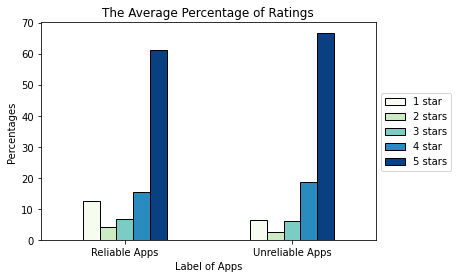

In [143]:
plt.figure(figsize=(30,8))
g=g.reset_index()
g.plot(x='app_label', y=['app_reviews_1','app_reviews_2','app_reviews_3','app_reviews_4','app_reviews_5'],
       kind="bar",  colormap='GnBu',edgecolor = "black")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.title('The Average Percentage of Ratings')
plt.xticks([0, 1], ['Reliable Apps', 'Unreliable Apps'], rotation=0)
plt.legend(['1 star', '2 stars', '3 stars', '4 star', '5 stars'], bbox_to_anchor=(1, 0.7))
plt.xlabel('Label of Apps')
plt.ylabel('Percentages')
plt.show()

### **2.4.2 Apps total reviews: Reliable vs. Unreliable Apps**

In [144]:
# Descriptive statistics of total reviews.
df_apps.groupby(["app_label"])["app_reviews_total"].describe()

,count,mean,std,min,25%,50%,75%,max
app_label,,,,,,,,
0,3734.0,10519.956079,23785.999966,1.0,504.25,2872.0,9568.75,331024.0
1,1890.0,1418.085185,11702.696866,1.0,5.00,12.0,41.00,246898.0


[Text(0, 0.5, 'Frequency')]

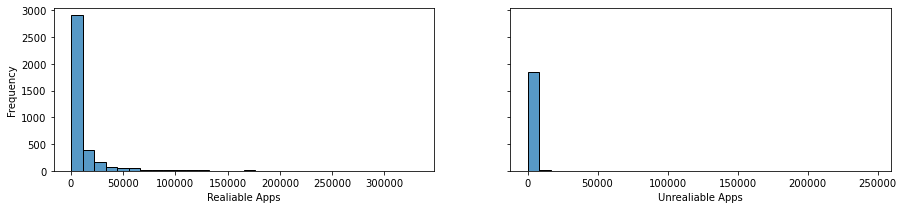

In [145]:
# Histogram of total reviews
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(15,3))

sns.histplot(df_apps[df_apps['app_label']==0]['app_reviews_total'], ax=ax0, bins=30)
sns.histplot(df_apps[df_apps['app_label']==1]['app_reviews_total'], ax=ax1, bins=30)
ax0.set(xlabel='Realiable Apps')
ax1.set(xlabel='Unrealiable Apps')
ax0.set(ylabel='Frequency')

***Is there a difference between reliable and reliable applications regarding total reviews?***

In [146]:
# use  skewness and kurtosis to measure the shape of a distribution.
print('kurtosis:', kurtosis(df_apps['app_reviews_total'], axis=0, bias=True))
print('skewness:', skew(df_apps['app_reviews_total'], axis=0, bias=True))

kurtosis: 55.32179997384242
skewness: 6.381781196796888


**Note:** This means the distribution is positively skewed and the distribution tends to produce more outliers that normal distibution.

In [147]:
# normality test
stat, p = shapiro(df_apps['app_reviews_total'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.372, p=0.000
Sample does not look Gaussian (reject H0)


In [148]:
# Carry out two sample t-test
stats.ttest_ind(df_apps['app_reviews_total'][df_apps['app_label'] == 0],
                df_apps['app_reviews_total'][df_apps['app_label'] == 1])

Ttest_indResult(statistic=15.701086758889346, pvalue=2.098937234214872e-54)

**Note:** Reliable apps have more reviews than unreliable apps.

### ***For Apps in Apps Dataset  -  A total of 5563***

**Note:** I have 5624 apps that comes from features dataframe and 5563 apps from app dataframe. Some apps' information is missing. 148 reviews of 61 applications are missing in dataframe.

The analyzes in this section are about 5563 applications.

In [149]:
# Get app related columns 

df_appr = df[['appId', 'price', 'paid','allRatingAverge','allRatingCount', 
   'curentRatingAverage','currentRatingCount', 'diff_init_curr_2', 
   'version_major', 'primaryGenre']]

In [150]:
df_appr.isna().sum()

appId                    0
price                  148
paid                   148
allRatingAverge        148
allRatingCount         148
curentRatingAverage    148
currentRatingCount     148
diff_init_curr_2       148
version_major          148
primaryGenre           148
dtype: int64

In [151]:
df_appr = df_appr.drop_duplicates(subset=['appId'])

In [152]:
# 61 apps info is missing
df_appr.isna().sum()

appId                   0
price                  61
paid                   61
allRatingAverge        61
allRatingCount         61
curentRatingAverage    61
currentRatingCount     61
diff_init_curr_2       61
version_major          61
primaryGenre           61
dtype: int64

In [153]:
# Merge df_apps and other info of apps
df_apps = pd.merge(df_apps, df_appr, how='inner', on='appId')

In [154]:
# drop 61 apps whose data is missing
df_apps.dropna(axis=0, inplace=True)

In [155]:
df_apps['appId'].nunique()

5563

### **2.4.3 Apps price:  Reliable vs. Unreliable Apps**

In [156]:
# Round the app prices
df_apps['price'] = round(df_apps['price'],2)

In [157]:
# Descriptive statistics of total reviews.
df_apps.groupby(["app_label"])["price"].describe()

,count,mean,std,min,25%,50%,75%,max
app_label,,,,,,,,
0,3693.0,0.879012,16.555748,0.0,0.0,0.0,0.0,999.99
1,1870.0,0.144791,0.856589,0.0,0.0,0.0,0.0,24.99


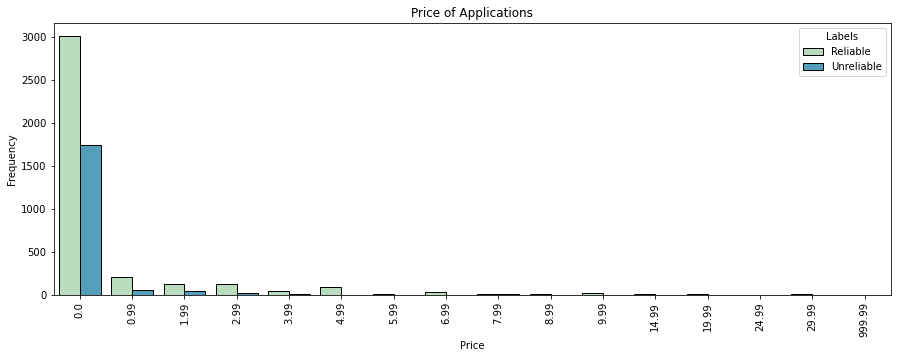

In [158]:
plt.figure(figsize=(15,5))
g = sns.countplot(data=df_apps, x="price", hue='app_label', palette='GnBu', edgecolor = "black")
g.set_title("Price of Applications")
g.set(xlabel="Price",
      ylabel="Frequency")
plt.xticks(rotation=90)
g.legend(title='Labels', labels = ['Reliable', 'Unreliable'], loc='upper right')
plt.show()

[Text(0, 0.5, 'Frequency')]

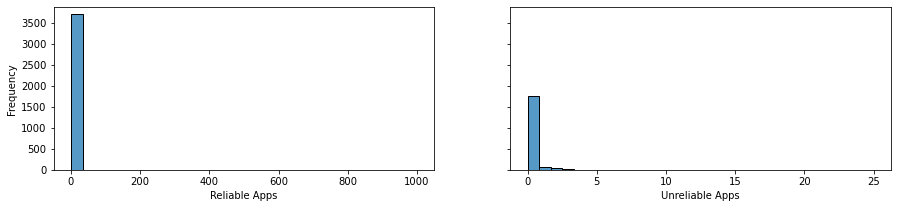

In [159]:
# Histogram of prices
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(15,3))

sns.histplot(df_apps[df_apps['app_label']==0]['price'], ax=ax0, bins=30)
sns.histplot(df_apps[df_apps['app_label']==1]['price'], ax=ax1, bins=30)
ax0.set(xlabel='Reliable Apps')
ax1.set(xlabel='Unreliable Apps')
ax0.set(ylabel='Frequency')

***Is there a difference between reliable and unreliable applications regarding apps' price?***

In [160]:
# normality test
stat, p = shapiro(df_apps['price'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.014, p=0.000
Sample does not look Gaussian (reject H0)


In [161]:
# Conduct two sample t test
stats.ttest_ind(df_apps['price'][df_apps['app_label'] == 0],
                df_apps['price'][df_apps['app_label'] == 1])

Ttest_indResult(statistic=1.9163947867086504, pvalue=0.055366067736684385)

**Note:** There is no price difference between apps. 

### **2.4.4 Paid or Free: Reliable vs. Unreliable Apps**

In [162]:
# create a crosstab paid/free vs reliable/unreliable
crosstab = pd.crosstab(df_apps['app_label'],df_apps['paid'])
crosstab

paid,0.0,1.0
app_label,,
0,3012,681
1,1746,124


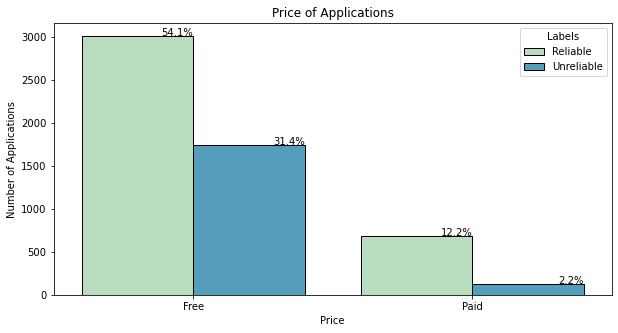

In [163]:
# Plot
plt.figure(figsize=(10,5))
ax = sns.countplot(data=df_apps, x="paid", hue='app_label',palette='GnBu', edgecolor = "black")

# Add title label, legend
ax.set_title("Price of Applications")
ax.set(xlabel="Price", ylabel="Number of Applications")
ax.set_xticklabels(['Free','Paid'])
ax.legend(title='Labels', labels = ['Reliable', 'Unreliable'], loc='upper right')

# Add percentages
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/5563)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage,(x, y), ha='right')
plt.show()

***Is there a difference between real and fake applications regarding they are paid or free?***

In [164]:
# carry out chi square test
chi2, p, dof, exp = chi2_contingency([crosstab.iloc[0].values,crosstab.iloc[1].values])
print('chi2   :', chi2)
print('p.     :', p)
print('dof    :', dof)
print('expected :', exp)

chi2   : 138.92766311683576
p.     : 4.5678860667932964e-32
dof    : 1
expected : [[3158.60039547  534.39960453]
 [1599.39960453  270.60039547]]


### **2.4.5 Apps' primary genre: Reliable vs. Unreliable Apps**

In [165]:
df_apps['app_label'].value_counts(normalize=True)

0    0.66385
1    0.33615
Name: app_label, dtype: float64

In [166]:
# Let's find the number of primary genre of applications 
df_apps['primaryGenre'].value_counts(ascending=False)

Games                     2576
Entertainment              354
Photo & Video              350
Utilities                  256
Social Networking          233
Health & Fitness           223
Productivity               212
Lifestyle                  192
Education                  180
Music                      132
Shopping                   111
Business                   109
Sports                      91
Finance                     90
Reference                   76
Travel                      68
News                        61
Medical                     54
Weather                     54
Food & Drink                48
Book                        34
Navigation                  30
Catalogs                    24
Magazines & Newspapers       3
Stickers                     2
Name: primaryGenre, dtype: int64

**Note:** There are two genres whose app frequency is so low. Calculating unreliable percentage is not fair. Therefore, Magazines & Newspapers and Stickers genres are excluded.

In [167]:
# Unreliable app percentages 
crosstab = round(pd.crosstab(df_apps[(df_apps['primaryGenre'] != 'Magazines & Newspapers') & 
                                     (df_apps['primaryGenre'] !='Stickers')]['primaryGenre']
                             ,df_apps['app_label'] 
           , normalize='index')*100,2 ).sort_values(by=1, ascending=False)
crosstab.head(10)

app_label,0,1
primaryGenre,,
Education,49.44,50.56
Sports,52.75,47.25
Navigation,56.67,43.33
Food & Drink,60.42,39.58
Games,61.65,38.35
Health & Fitness,64.13,35.87
Social Networking,66.09,33.91
Lifestyle,66.15,33.85
Travel,67.65,32.35


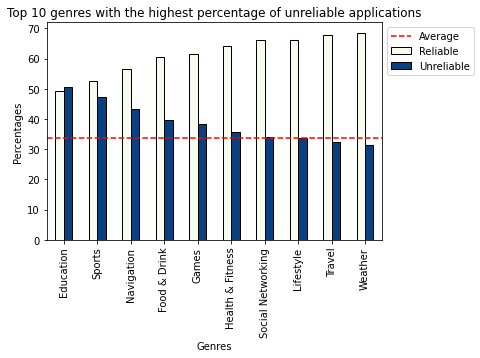

In [168]:
ax= crosstab.head(10).plot(kind='bar', colormap='GnBu',edgecolor = "black")

# Labels
plt.title('Top 10 genres with the highest percentage of unreliable applications')
plt.xlabel('Genres')
plt.ylabel('Percentages')

# Show average of unreliable app percentage for all genres
plt.axhline(y=33.6, color = 'r', linestyle='dashed', label="Average")

labels = [ "Average", 'Reliable', 'Unreliable',]
handles, _ = ax.get_legend_handles_labels()

# Slice list to remove first handle
plt.legend(handles = handles[:], labels = labels, bbox_to_anchor=(1, 1))
plt.show()

***Is there a difference between reliable and unreliable applications regarding top ten  primary genres?***

In [169]:
# Create a crosstab for chi square test
crosstab = pd.crosstab(df_apps[(df_apps['primaryGenre'] != 'Magazines & Newspapers') & 
                                     (df_apps['primaryGenre'] !='Stickers')]['primaryGenre']
                             ,df_apps['app_label']).sort_values(by=1, ascending=False)
g = crosstab.T.head(10)

In [170]:
# carry out chi square test
chi2, p, dof, exp = chi2_contingency([g.iloc[0].values,g.iloc[1].values])
print('chi2   :', chi2)
print('p.     :', p)
print('dof    :', dof)
print('expected :', exp)

chi2   : 166.39751511755884
p.     : 3.659917967835321e-24
dof    : 22
expected : [[1711.15365239  232.49370277  119.56819     235.15077366  148.13170205
   154.77437927  170.05253688  127.53940266   60.44836272  140.82475711
    87.68333933   72.40518172   73.73371716   45.17020511   31.88485067
    35.870457     59.784095     50.48434689   19.92803167   35.870457
    22.58510255   15.94242533   40.52033105]
 [ 864.84634761  117.50629723   60.43181     118.84922634   74.86829795
    78.22562073   85.94746312   64.46059734   30.55163728   71.17524289
    44.31666067   36.59481828   37.26628284   22.82979489   16.11514933
    18.129543     30.215905     25.51565311   10.07196833   18.129543
    11.41489745    8.05757467   20.47966895]]


**Is there a difference between reliable and unreliable applications whose genre is education?**

In [171]:
chisquare([89,91], f_exp=[60, 120])

Power_divergenceResult(statistic=21.025000000000002, pvalue=4.5332938356574e-06)

**Is there a difference between realiable and unreliable applications whose genre is sport?**

In [172]:
chisquare([48, 43], f_exp=[31, 60])

Power_divergenceResult(statistic=14.139247311827956, pvalue=0.00016976463825063657)

**Is there a difference between realiable and unreliable applications whose genre is navigation?**

In [173]:
chisquare([17,13], f_exp=[10,20])

Power_divergenceResult(statistic=7.3500000000000005, pvalue=0.006706275607805574)

**Is there a difference between realiable and unreliable applications whose genre is Food & Drink?**

In [174]:
chisquare([29, 19], f_exp=[16, 32])

Power_divergenceResult(statistic=15.84375, pvalue=6.87933731938309e-05)

**Is there a difference between realiable and unreliable applications whose genre is Games?**

In [175]:
chisquare([1588, 988], f_exp=[866,1710])

Power_divergenceResult(statistic=906.7890171927123, pvalue=3.2807724080930025e-199)

**Is there a difference between realiable and unreliable applications whose genre is Health & Fitness?**

In [176]:
chisquare([143, 80], f_exp=[148, 75])

Power_divergenceResult(statistic=0.5022522522522522, pvalue=0.4785121702748163)

**Is there a difference between realiable and unreliable applications whose genre is Social Networking?**

In [177]:
chisquare([154, 79], f_exp=[155, 78])

Power_divergenceResult(statistic=0.019272125723738626, pvalue=0.8895891636173435)

### **2.4.6 Apps all rating average: Reliable vs. Unreliable Apps**

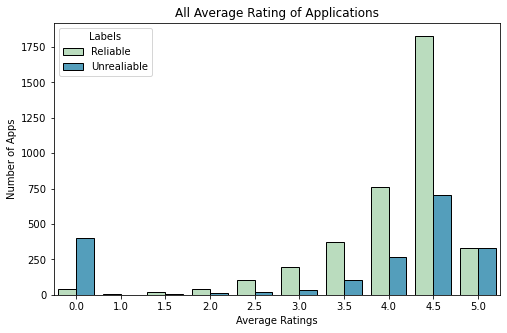

In [178]:
plt.figure(figsize=(8,5))
ax = sns.countplot(data=df_apps, x ='allRatingAverge', hue='app_label',palette='GnBu', edgecolor = "black")
ax.set_title("All Average Rating of Applications")
ax.set(xlabel="Average Ratings",
      ylabel="Number of Apps")
ax.legend(title='Labels', labels = ['Reliable', 'Unrealiable'], loc='upper left')
plt.show()

**Note:**  The distribution of apps' average ratings is different from review ratings. While real users give more 1-star reviews, unreliable apps have fewer average ratings. The number of unreliable apps which have 0.0 rating is more than reliable ones.

### **2.4.7 App version: Reliable vs. Unreliable App**

In [179]:
# Unreliable app percentages 
crosstab = pd.crosstab(df_apps['version_major']
                             ,df_apps['app_label']
                      , margins='All').sort_values(by='All', ascending=False)
crosstab.head(15)

app_label,0,1,All
version_major,,,
All,3693,1870,5563
1.0,1405,1314,2719
2.0,696,290,986
3.0,522,108,630
4.0,354,61,415
5.0,251,33,284
6.0,138,15,153
7.0,92,13,105
8.0,59,8,67


In [180]:
crosstab.head(15).index

Index(['All', 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 0.0, 17.0,
       11.0, 12.0],
      dtype='object', name='version_major')

**Note:** Most of the app versions gather in version 1.0, 2.0, 3.0, 4.0. I calculate the unreliable app percentage for versions whose freq is more than 10.

In [181]:
# Define df for selected versions
df_version = df_apps[df_apps['version_major'].isin([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 
                                  7.0, 8.0, 9.0, 10.0, 0.0, 17.0, 
                                  11.0, 12.0])]

In [182]:
# Unreliable app percentages 
crosstab = round(pd.crosstab(df_version['version_major']
                             ,df_version['app_label'] 
           , normalize='index')*100,2 ).sort_values(by=1, ascending=False)
crosstab

app_label,0,1
version_major,,
1.0,51.67,48.33
0.0,56.00,44.00
2.0,70.59,29.41
3.0,82.86,17.14
4.0,85.30,14.70
10.0,86.49,13.51
11.0,86.67,13.33
7.0,87.62,12.38
8.0,88.06,11.94


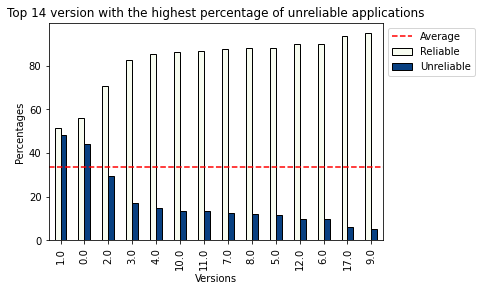

In [183]:
ax= crosstab.plot(kind='bar', colormap='GnBu',edgecolor = "black")

# Labels
plt.title('Top 14 version with the highest percentage of unreliable applications')
plt.xlabel('Versions')
plt.ylabel('Percentages')

# Show average of unreliable app percentage for all genres
plt.axhline(y=33.6, color = 'r', linestyle='dashed', label="Average")

labels = [ "Average", 'Reliable', 'Unreliable',]
handles, _ = ax.get_legend_handles_labels()

# Slice list to remove first handle
plt.legend(handles = handles[:], labels = labels,bbox_to_anchor=(1, 1))
plt.show()

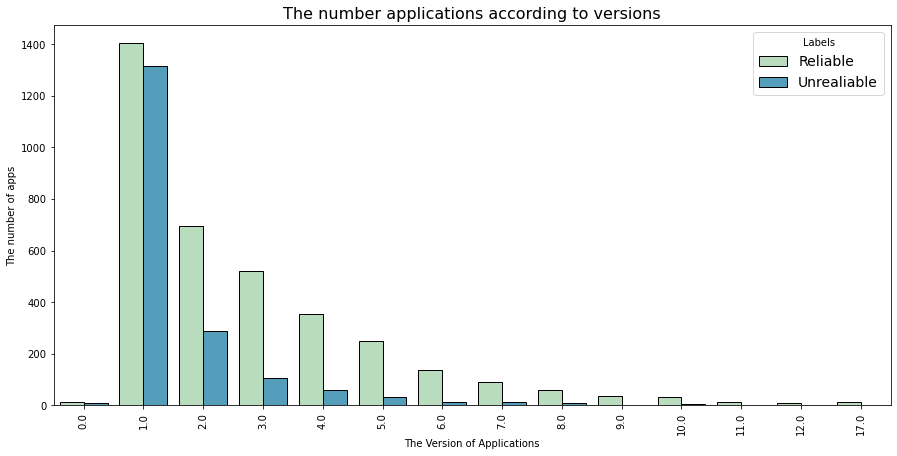

In [184]:
# Select the versions
data = df_apps[df_apps['version_major'].isin([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                                       9.0, 10.0, 0.0, 17.0, 11.0, 12.0])]


plt.figure(figsize=(15,7))
g = sns.countplot(data=data, 
                  x="version_major", hue='app_label', palette='GnBu', edgecolor = "black")
g.set_title("The number applications according to versions", fontsize=16)
g.set(xlabel="The Version of Applications", ylabel="The number of apps")
g.legend(title='Labels', labels = ['Reliable', 'Unrealiable'], fontsize=14, loc='upper right')
plt.xticks(rotation=90)
plt.show()

### **2.4.8 Time difference between initial and current release: Reliable vs. Unreliable Apps**

In [185]:
df_apps["diff_init_curr_2"]=(df_apps["diff_init_curr_2"] / np.timedelta64(1, 'D')).astype(int)

In [186]:
# Descriptive statistics of total reviews.
df_apps.groupby(["app_label"])["diff_init_curr_2"].describe()

,count,mean,std,min,25%,50%,75%,max
app_label,,,,,,,,
0,3693.0,1213.952613,826.701849,0.0,507.0,1167.0,1844.00,3167.0
1,1870.0,354.428877,479.060551,0.0,7.0,157.0,530.75,3147.0


[Text(0, 0.5, 'Frequency')]

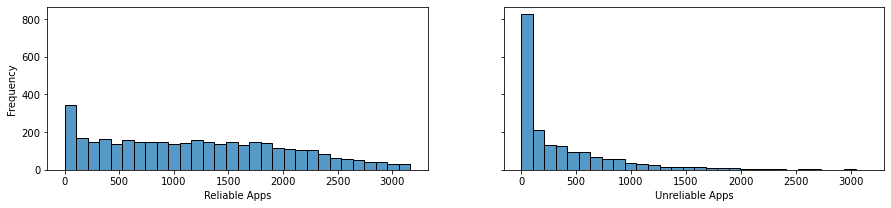

In [187]:
# Histogram of prices
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(15,3))

sns.histplot(df_apps[df_apps['app_label']==0]['diff_init_curr_2'], ax=ax0, bins=30)
sns.histplot(df_apps[df_apps['app_label']==1]['diff_init_curr_2'], ax=ax1, bins=30)
ax0.set(xlabel='Reliable Apps')
ax1.set(xlabel='Unreliable Apps')
ax0.set(ylabel='Frequency')

***Is there a difference between real and fake applications regarding apps' price?***

In [188]:
# use  skewness and kurtosis to measure the shape of a distribution.
print('kurtosis:', kurtosis(df_apps['diff_init_curr_2'], axis=0, bias=True))
print('skewness:', skew(df_apps['diff_init_curr_2'], axis=0, bias=True))

kurtosis: -0.579081291910517
skewness: 0.691126422816384


**Note:**

This means the distribution is slightly positively skewed and tends to produce fewer and less extreme outliers than the normal distribution.

In [189]:
# normality test
stat, p = shapiro(df_apps['diff_init_curr_2'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.907, p=0.000
Sample does not look Gaussian (reject H0)


In [190]:
# Carrying out the t test test
stats.ttest_ind(df_apps['diff_init_curr_2'][df_apps['app_label'] == 0],
                df_apps['diff_init_curr_2'][df_apps['app_label'] == 1])

Ttest_indResult(statistic=41.56414902949182, pvalue=0.0)

# Download dataframe for pre-processing

In [191]:
df.shape

(16000, 114)

In [192]:
# download the dataframe as .csv to use in EDA
from IPython.display import FileLink, FileLinks

df.to_csv('/Users/handedede/Documents/GitHub/capstone_fake_review/notebooks/data_preprocess.csv', index=False)

In [193]:
df.dtypes[107:]

Music         float64
user_label    float64
ave_length    float64
ave_rating    float64
ave_price     float64
1_review        int64
app_label       int64
dtype: object